In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
import pandas as pd
import random
from model_structure import get_preprocessing_transforms,BCNN, train_model, evaluate_model

In [2]:
INPUT_SIZE = 224
BATCH_SIZE = 32
DEVICE =torch.device('cuda' if torch.cuda.is_available() else 'cpu')#torch.device('cpu')

In [3]:

# Get transforms
train_transform, val_transform = get_preprocessing_transforms(INPUT_SIZE)

test_data_1_dir = 'data4model_1/test/'
test_data_2_dir = 'data4model_2/test/'
train_data_1_dir = 'data4model_1/train/'
train_data_2_dir = 'data4model_2/train/'

# Load data set
dataset_test_1 = datasets.ImageFolder(test_data_1_dir,transform=val_transform)
dataset_train_1 = datasets.ImageFolder(train_data_1_dir,transform=val_transform)
dataset_test_2 = datasets.ImageFolder(test_data_2_dir,transform=val_transform)
dataset_train_2 = datasets.ImageFolder(train_data_2_dir,transform=val_transform)
additional_set = datasets.ImageFolder('data4model_1/for_extra_test/',transform=val_transform)



additional_loader = DataLoader(additional_set, shuffle=False, batch_size=BATCH_SIZE)
test_loader_1 = DataLoader(dataset_test_1, shuffle=False, batch_size=BATCH_SIZE)
train_loader_1 = DataLoader(dataset_train_1, shuffle=False, batch_size=BATCH_SIZE)
test_loader_2 = DataLoader(dataset_test_2, shuffle=False, batch_size=BATCH_SIZE)
train_loader_2 = DataLoader(dataset_train_2, shuffle=False, batch_size=BATCH_SIZE)

dataSets =  {"Model_1:Train": train_loader_1,
        "Model_1:Test": test_loader_1,
        "Model_2:Train": train_loader_2,
        "Model_2:Test": test_loader_2,
        "Model_1:additional_set": additional_loader
        }

In [4]:
model_1_dir = 'best_model_1.pth'
model_2_dir = 'best_model_2.pth'


In [5]:
# Load the model
model_1 = BCNN().to(DEVICE)
weights = torch.load(model_1_dir, map_location=torch.device(DEVICE))
model_1.load_state_dict(weights)
model_1.eval()

model_2 = BCNN().to(DEVICE)
weights = torch.load(model_2_dir, map_location=torch.device(DEVICE))
model_2.load_state_dict(weights)
model_2.eval()

C:\Users\hskay\AppData\Local\Temp\ipykernel_35920\1438434258.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(model_1_dir, map_location=torch.device(

BCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout2d(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout2d(p=0.25, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=512, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)

In [6]:
for key in dataSets:
    print(key)
    if "Model_1" in key:
        model = model_1
    else:
        model = model_2
    
    results = evaluate_model(model.to(DEVICE), dataSets[key], DEVICE)
    print("Accuracy: ", results[0])
    print("F1 Score: ", results[1])
    print("confusion Matrix: \n",results[3])
    print("\n")

Model_1:Train
Accuracy:  0.9283333333333333
F1 Score:  0.9271926854046733
confusion Matrix: 
 [[1416   84]
 [ 131 1369]]


Model_1:Test
Accuracy:  0.87
F1 Score:  0.8617021276595744
confusion Matrix: 
 [[93  7]
 [19 81]]


Model_2:Train
Accuracy:  0.9436666666666667
F1 Score:  0.9452188006482982
confusion Matrix: 
 [[1373  127]
 [  42 1458]]


Model_2:Test
Accuracy:  0.89
F1 Score:  0.8981481481481481
confusion Matrix: 
 [[81 19]
 [ 3 97]]


Model_1:additional_set
Accuracy:  0.723422860712055
F1 Score:  0.7165172855313701
confusion Matrix: 
 [[2993 1007]
 [1207 2798]]




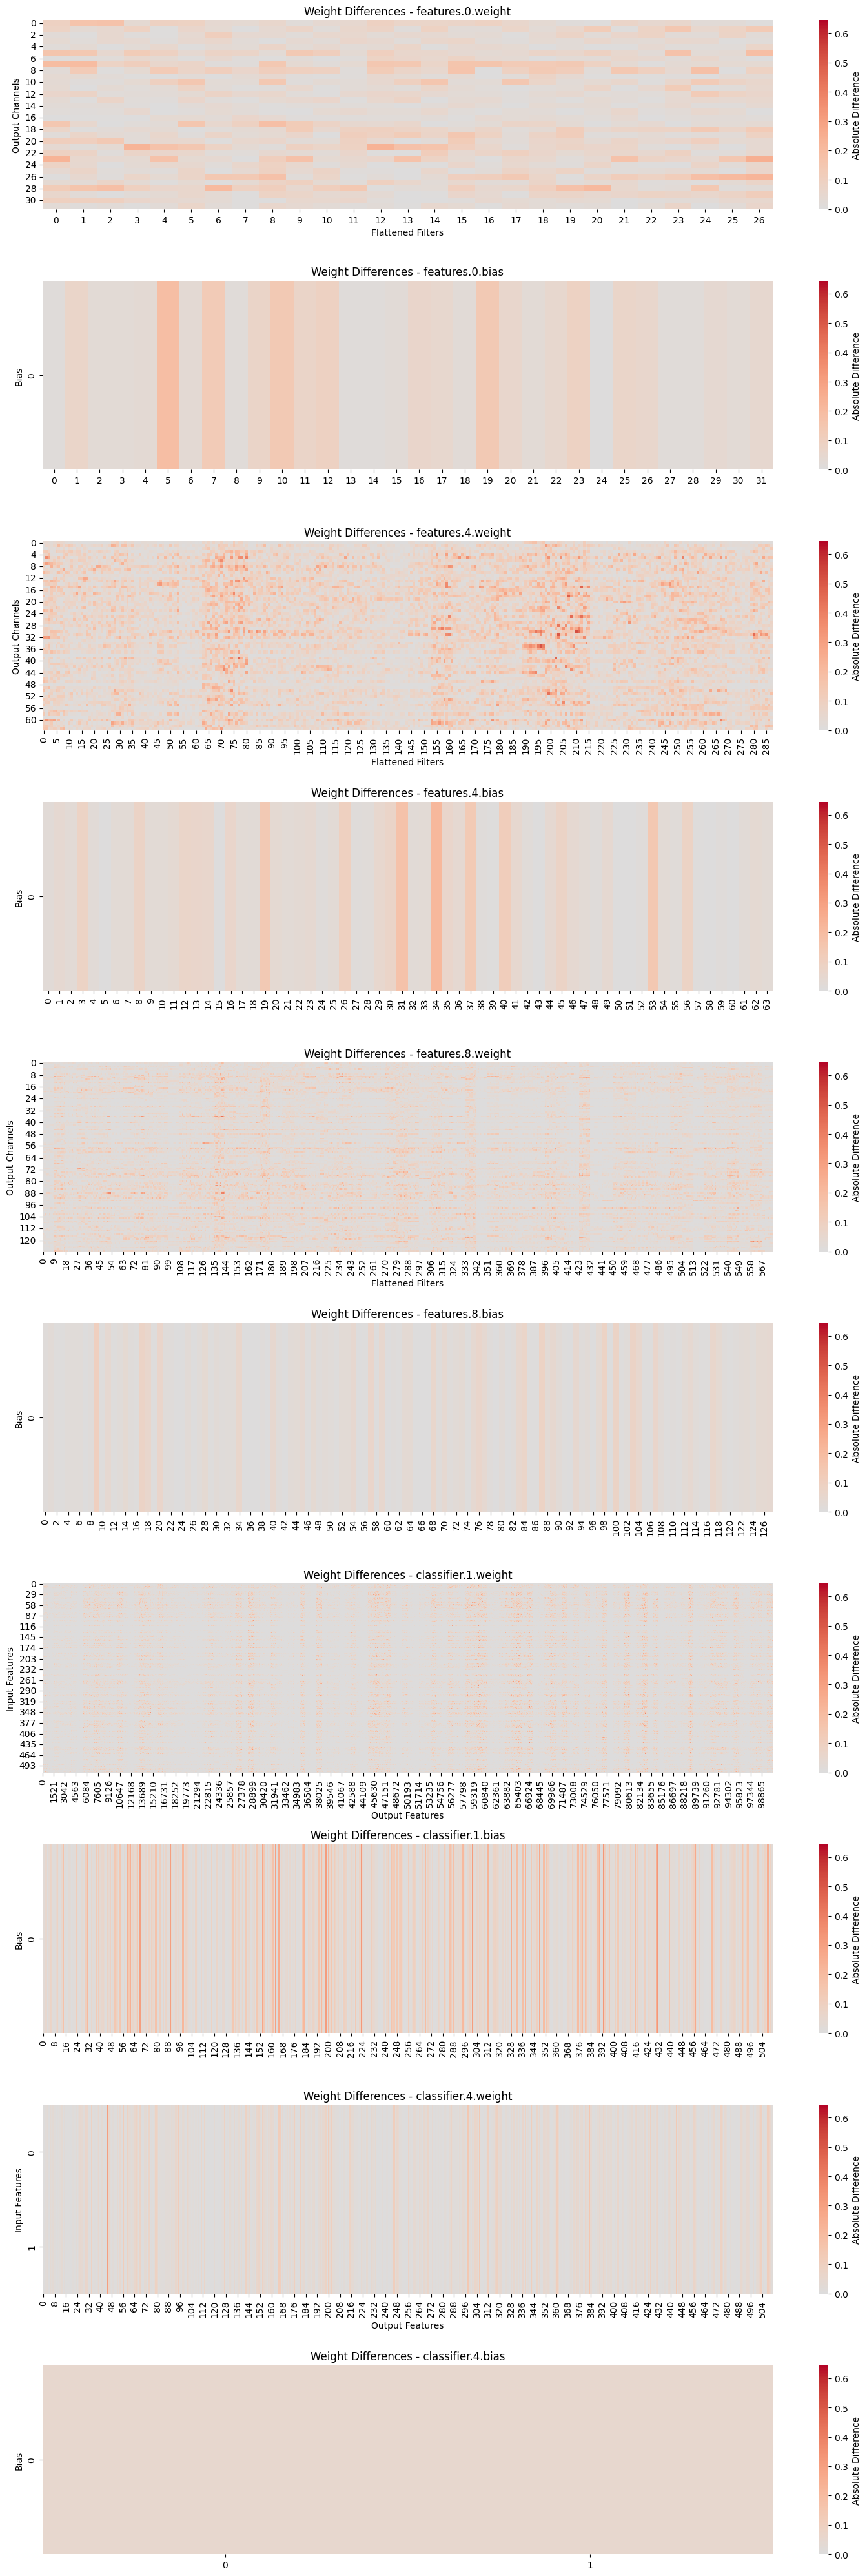


Layer: features.0.weight
Mean absolute difference: 0.050212
Max absolute difference: 0.246948
Standard deviation of differences: 0.043228

Layer: features.0.bias
Mean absolute difference: 0.054089
Max absolute difference: 0.189174
Standard deviation of differences: 0.043046

Layer: features.4.weight
Mean absolute difference: 0.065546
Max absolute difference: 0.523075
Standard deviation of differences: 0.060329

Layer: features.4.bias
Mean absolute difference: 0.044027
Max absolute difference: 0.211780
Standard deviation of differences: 0.042529

Layer: features.8.weight
Mean absolute difference: 0.032271
Max absolute difference: 0.437648
Standard deviation of differences: 0.036823

Layer: features.8.bias
Mean absolute difference: 0.024380
Max absolute difference: 0.105519
Standard deviation of differences: 0.022068

Layer: classifier.1.weight
Mean absolute difference: 0.019592
Max absolute difference: 0.643685
Standard deviation of differences: 0.031763

Layer: classifier.1.bias
Mean 

In [7]:
def compare_model_weights(model_1, model_2):
    weight_differences = {}
    state_dict_1 = model_1.state_dict()
    state_dict_2 = model_2.state_dict()
    
    for (name1, param1), (name2, param2) in zip(state_dict_1.items(), state_dict_2.items()):
        if name1 == name2:  # Ensuring
            diff = (param1 - param2).abs()
            weight_differences[name1] = diff.cpu().numpy()
    
    return weight_differences

def visualize_weight_differences(weight_differences):
    num_params = len(weight_differences)
    fig = plt.figure(figsize=(15, 4 * num_params))

    all_diffs = np.concatenate([diff.flatten() for diff in weight_differences.values()])
    vmin, vmax = np.min(all_diffs), np.max(all_diffs)
    
    for idx, (param_name, diff) in enumerate(weight_differences.items(), 1):
        plt.subplot(num_params, 1, idx)
        
        if len(diff.shape) == 1:  # Bias vectors
            diff_2d = diff.reshape(1, -1)
            sns.heatmap(diff_2d, cmap='coolwarm', center=0, 
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}')
            plt.ylabel('Bias')
        
        elif len(diff.shape) == 2:  # Fully connected layers
            sns.heatmap(diff, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}')
            plt.xlabel('Output Features')
            plt.ylabel('Input Features')
        
        elif len(diff.shape) == 4:  # Convolutional layers
            diff_reshaped = diff.reshape(diff.shape[0], -1)
            sns.heatmap(diff_reshaped, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}')
            plt.xlabel('Flattened Filters')
            plt.ylabel('Output Channels')
    
    plt.tight_layout()
    plt.savefig('weight_differences.png')
    plt.show()

differences = compare_model_weights(model_1, model_2)
visualize_weight_differences(differences)

for layer_name, diff in differences.items():
    print(f"\nLayer: {layer_name}")
    print(f"Mean absolute difference: {np.mean(np.abs(diff)):.6f}")
    print(f"Max absolute difference: {np.max(np.abs(diff)):.6f}")
    print(f"Standard deviation of differences: {np.std(diff):.6f}")


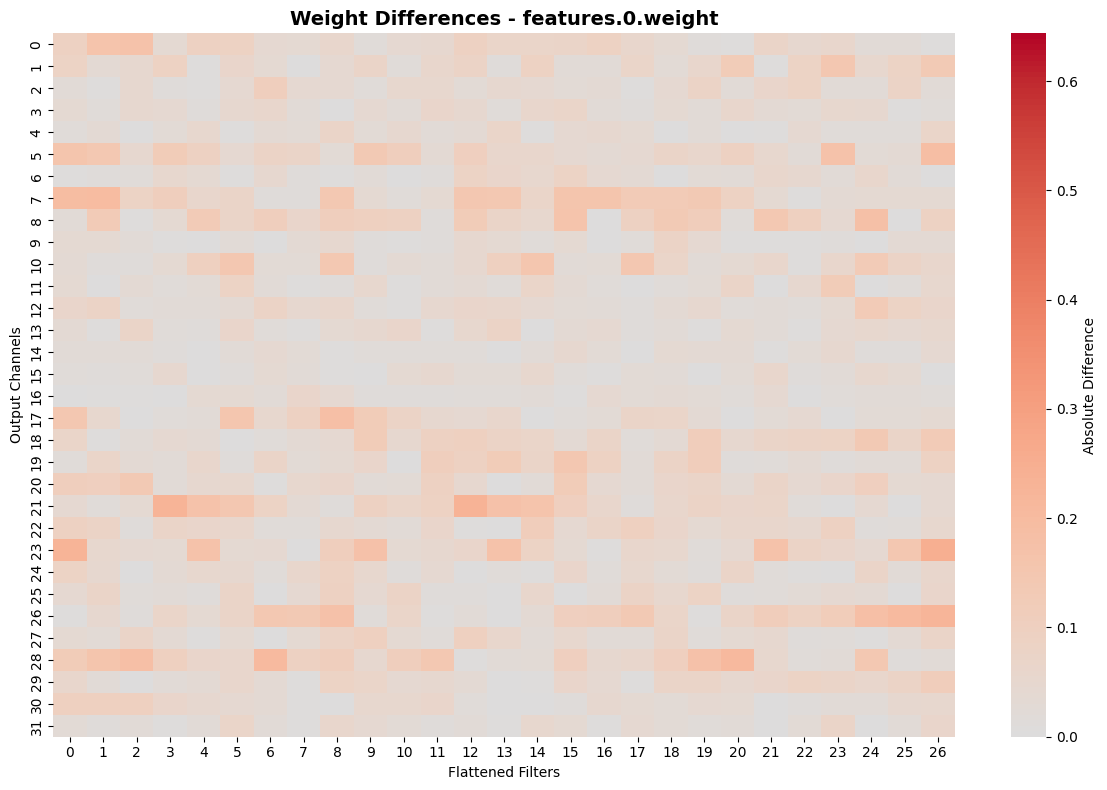

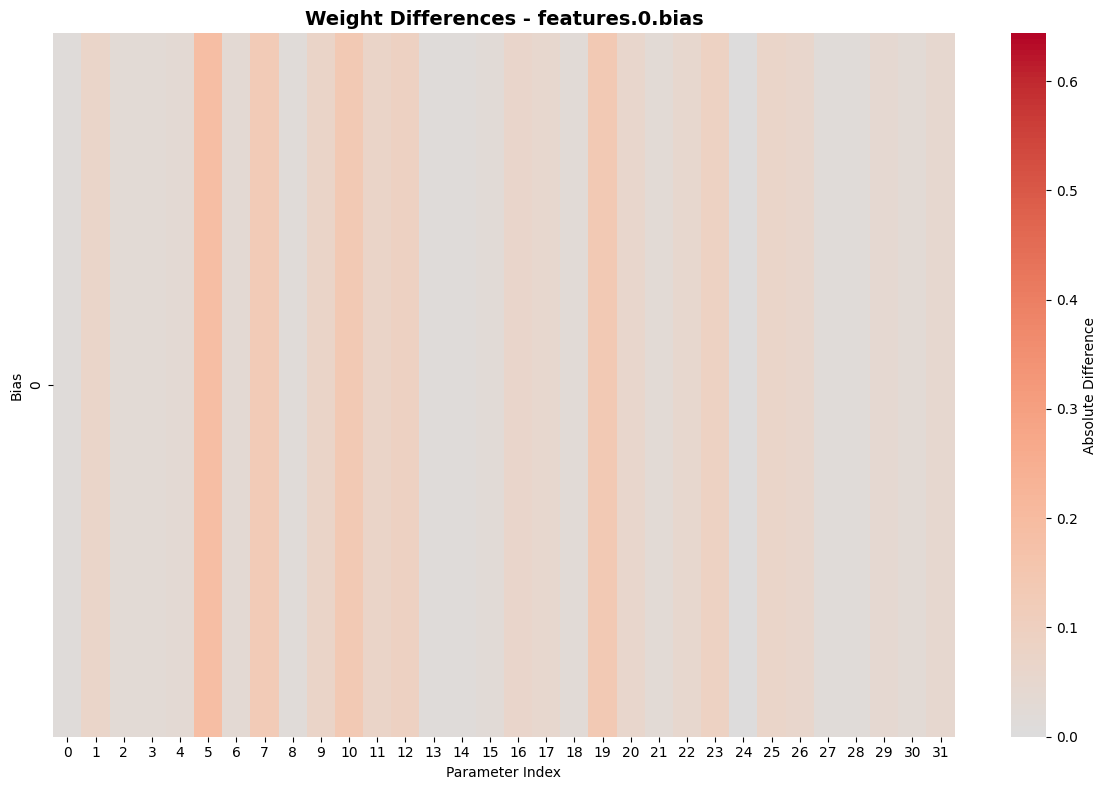

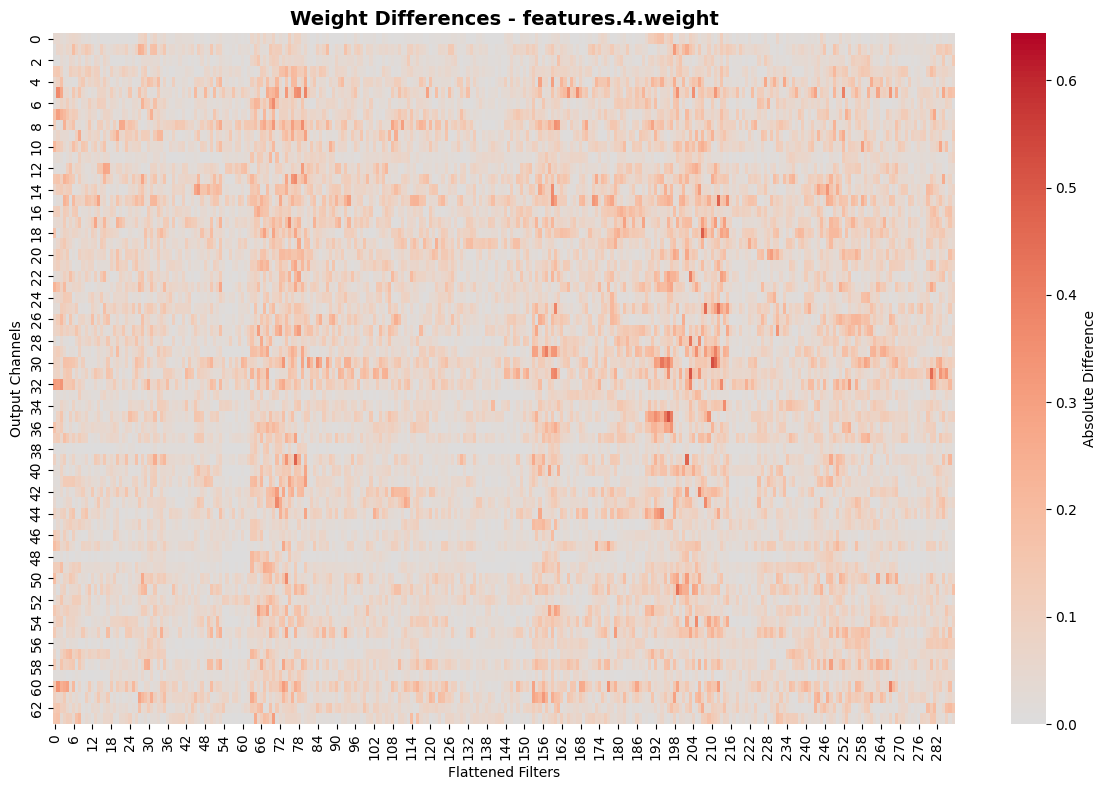

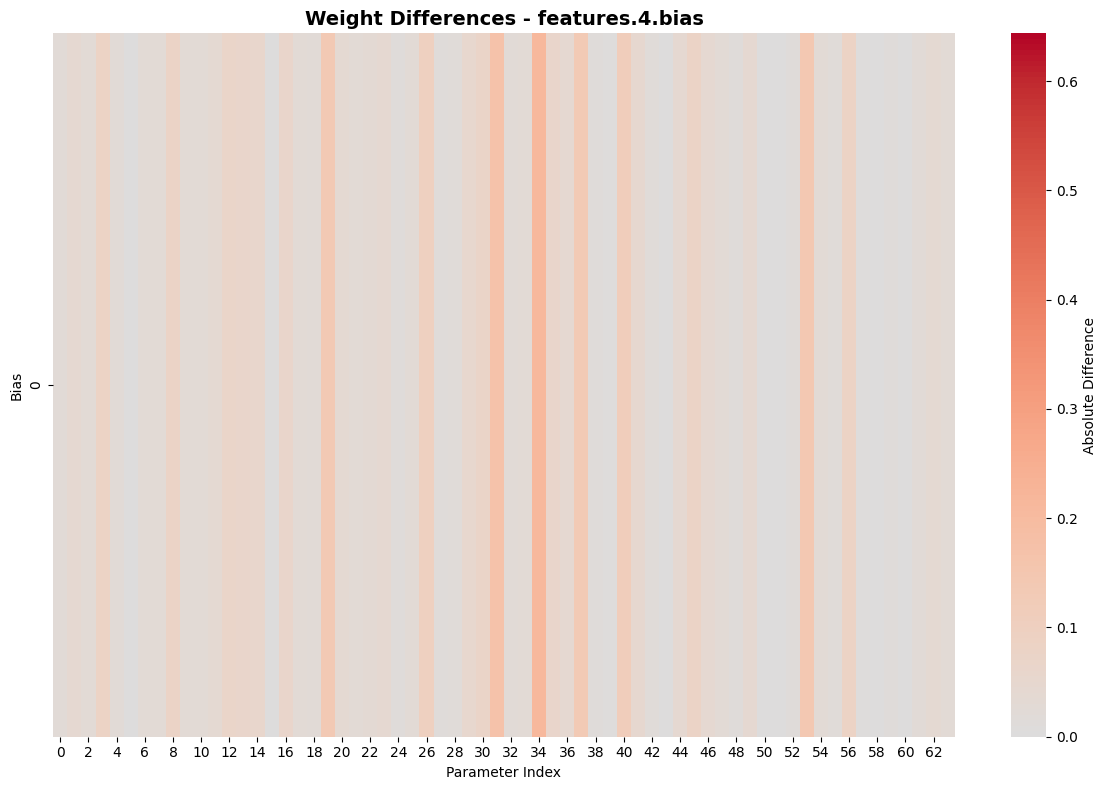

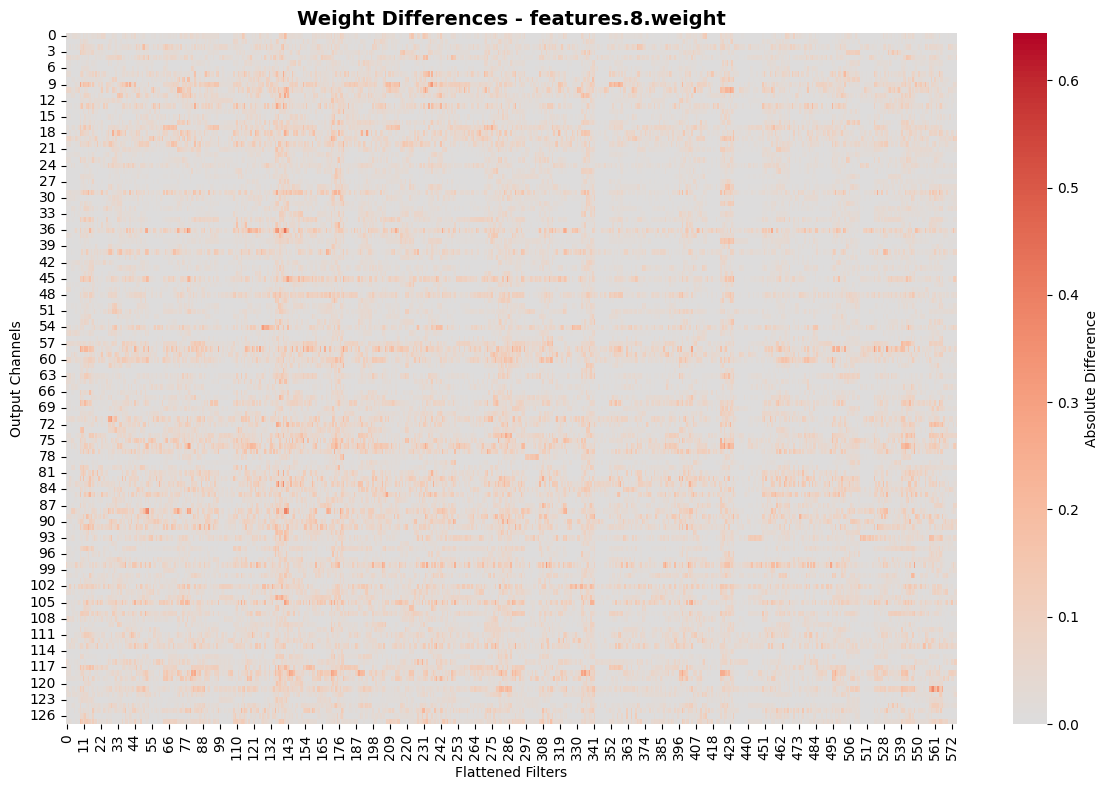

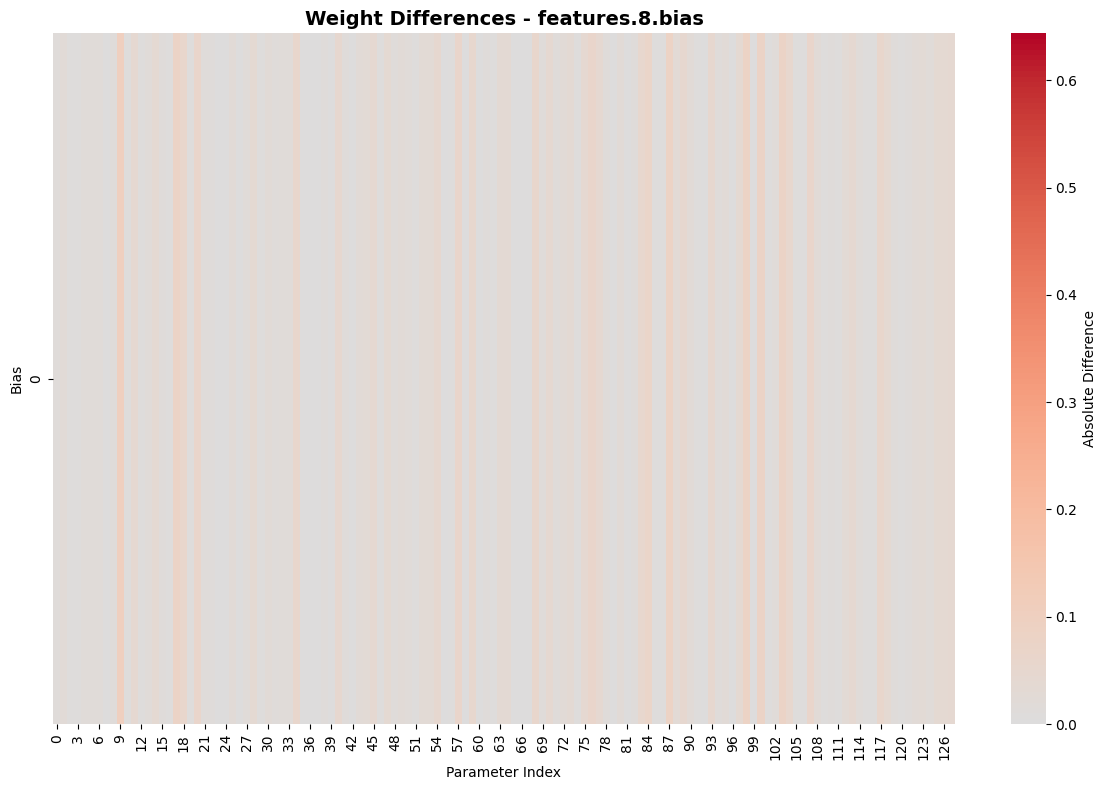

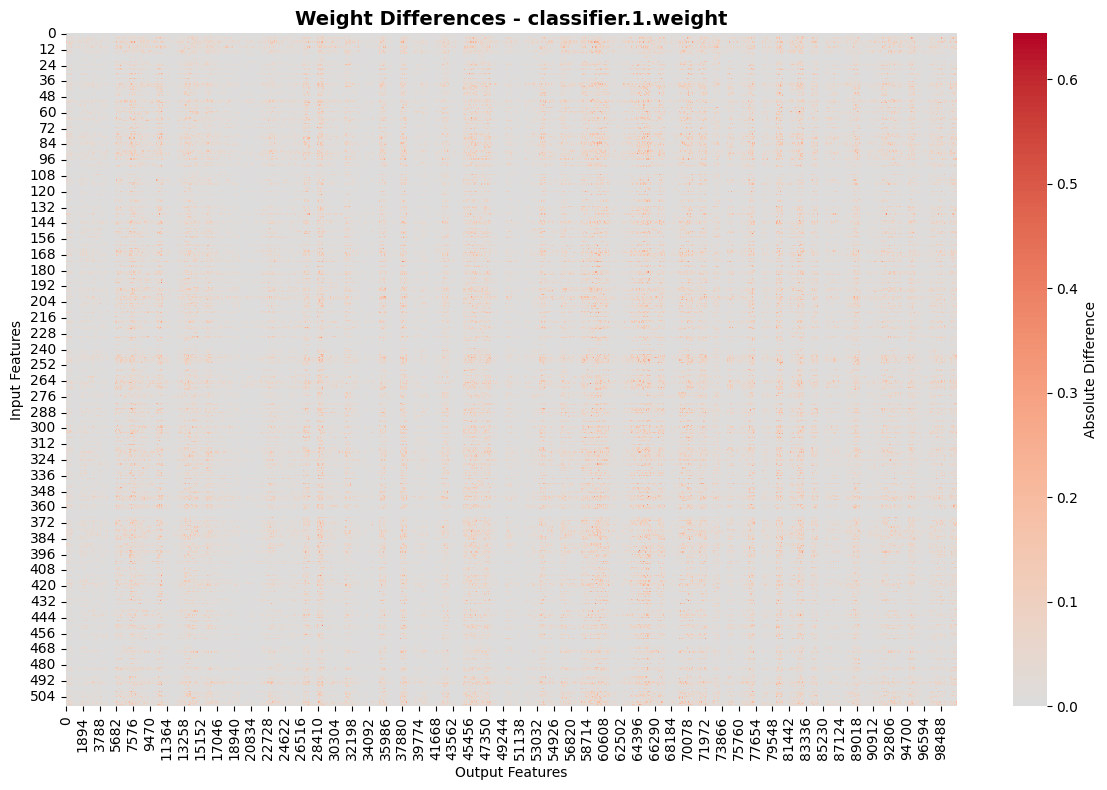

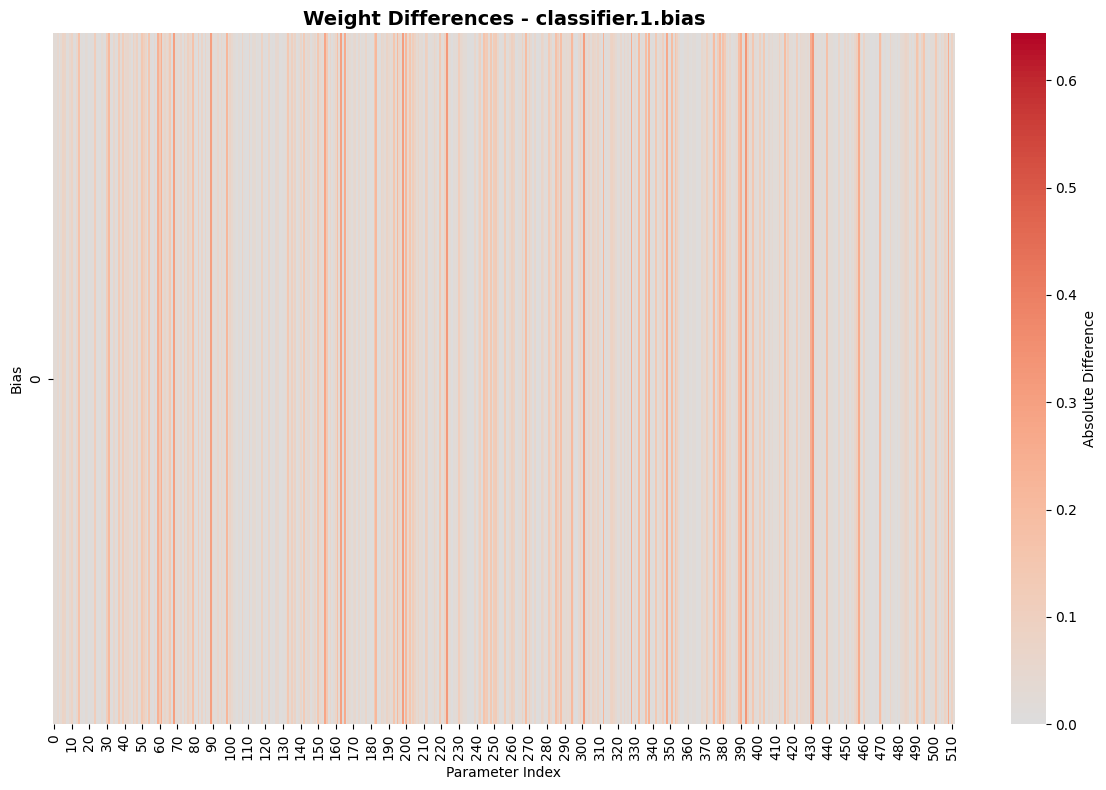

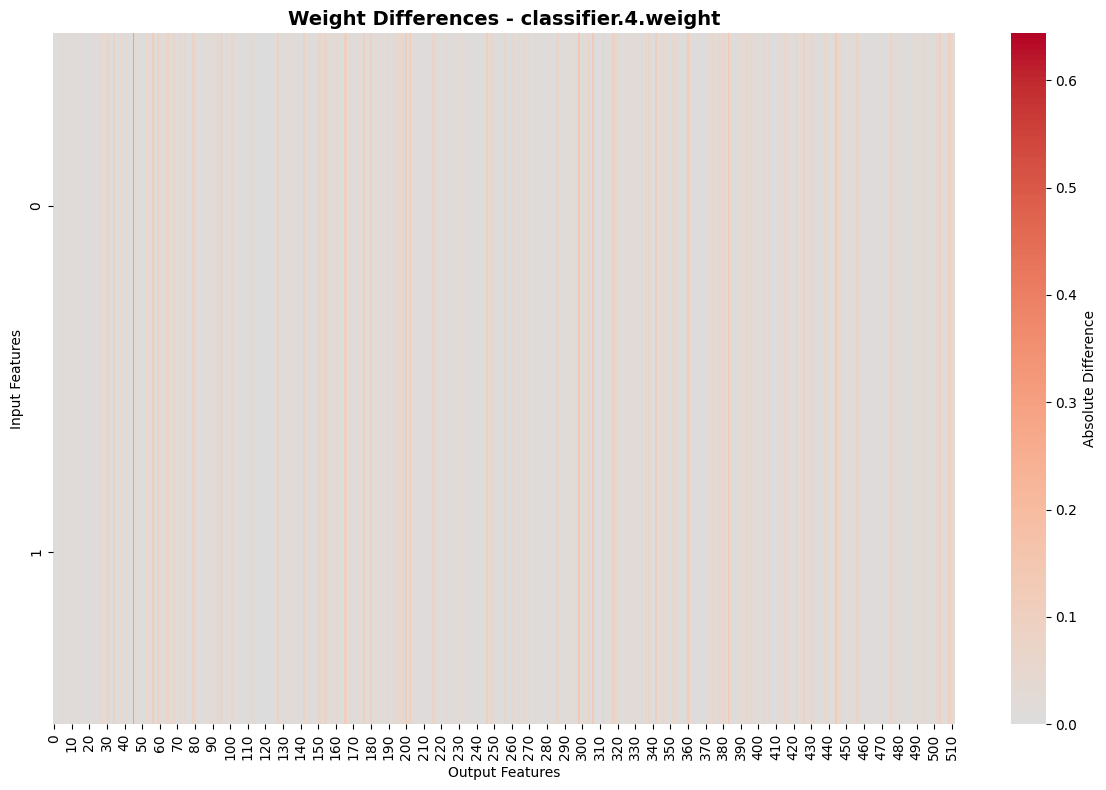

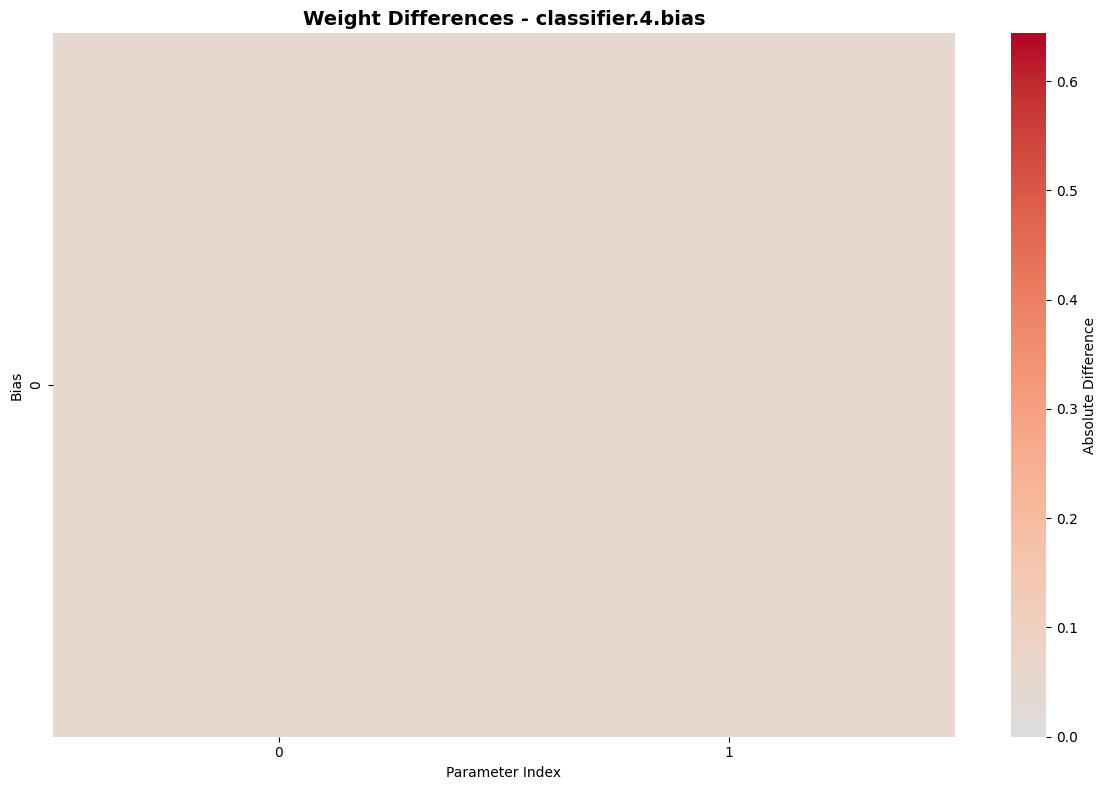


Layer: features.0.weight
Mean absolute difference: 0.050212
Max absolute difference: 0.246948
Standard deviation of differences: 0.043228

Layer: features.0.bias
Mean absolute difference: 0.054089
Max absolute difference: 0.189174
Standard deviation of differences: 0.043046

Layer: features.4.weight
Mean absolute difference: 0.065546
Max absolute difference: 0.523075
Standard deviation of differences: 0.060329

Layer: features.4.bias
Mean absolute difference: 0.044027
Max absolute difference: 0.211780
Standard deviation of differences: 0.042529

Layer: features.8.weight
Mean absolute difference: 0.032271
Max absolute difference: 0.437648
Standard deviation of differences: 0.036823

Layer: features.8.bias
Mean absolute difference: 0.024380
Max absolute difference: 0.105519
Standard deviation of differences: 0.022068

Layer: classifier.1.weight
Mean absolute difference: 0.019592
Max absolute difference: 0.643685
Standard deviation of differences: 0.031763

Layer: classifier.1.bias
Mean 

In [8]:
def compare_model_weights(model_1, model_2):
    weight_differences = {}
    state_dict_1 = model_1.state_dict()
    state_dict_2 = model_2.state_dict()
    
    for (name1, param1), (name2, param2) in zip(state_dict_1.items(), state_dict_2.items()):
        if name1 == name2:  # Ensuring names match
            diff = (param1 - param2).abs()
            weight_differences[name1] = diff.cpu().numpy()
    
    return weight_differences

def visualize_weight_differences_separate(weight_differences):
    # Calculate global min/max for consistent color scaling across all plots
    all_diffs = np.concatenate([diff.flatten() for diff in weight_differences.values()])
    vmin, vmax = np.min(all_diffs), np.max(all_diffs)
    
    for param_name, diff in weight_differences.items():
        # Create a separate figure for each parameter
        plt.figure(figsize=(12, 8))
        
        if len(diff.shape) == 1:  # Bias vectors
            diff_2d = diff.reshape(1, -1)
            sns.heatmap(diff_2d, cmap='coolwarm', center=0, 
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.ylabel('Bias')
            plt.xlabel('Parameter Index')
        
        elif len(diff.shape) == 2:  # Fully connected layers
            sns.heatmap(diff, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.xlabel('Output Features')
            plt.ylabel('Input Features')
        
        elif len(diff.shape) == 4:  # Convolutional layers
            diff_reshaped = diff.reshape(diff.shape[0], -1)
            sns.heatmap(diff_reshaped, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.xlabel('Flattened Filters')
            plt.ylabel('Output Channels')
        
        # Save each plot with a unique filename
        safe_param_name = param_name.replace('.', '_').replace('/', '_')
        plt.tight_layout()
        plt.savefig(f'weight_differences_{safe_param_name}.png', dpi=300, bbox_inches='tight')
        plt.show()

# Alternative version with customizable color scaling per plot
def visualize_weight_differences_separate_individual_scaling(weight_differences):
    for param_name, diff in weight_differences.items():
        # Create a separate figure for each parameter
        plt.figure(figsize=(12, 8))
        
        # Use individual min/max for each plot (better contrast per plot)
        vmin, vmax = np.min(diff), np.max(diff)
        
        if len(diff.shape) == 1:  # Bias vectors
            diff_2d = diff.reshape(1, -1)
            sns.heatmap(diff_2d, cmap='coolwarm', center=0, 
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.ylabel('Bias')
            plt.xlabel('Parameter Index')
        
        elif len(diff.shape) == 2:  # Fully connected layers
            sns.heatmap(diff, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.xlabel('Output Features')
            plt.ylabel('Input Features')
        
        elif len(diff.shape) == 4:  # Convolutional layers
            diff_reshaped = diff.reshape(diff.shape[0], -1)
            sns.heatmap(diff_reshaped, cmap='coolwarm', center=0,
                       vmin=vmin, vmax=vmax,
                       cbar_kws={'label': 'Absolute Difference'})
            plt.title(f'Weight Differences - {param_name}', fontsize=14, fontweight='bold')
            plt.xlabel('Flattened Filters')
            plt.ylabel('Output Channels')
        
        # Save each plot with a unique filename
        safe_param_name = param_name.replace('.', '_').replace('/', '_')
        plt.tight_layout()
        plt.savefig(f'weight_differences_{safe_param_name}_individual_scale.png', dpi=300, bbox_inches='tight')
        plt.show()

# Usage
differences = compare_model_weights(model_1, model_2)

# Option 1: Separate plots with global color scaling (consistent across all plots)
visualize_weight_differences_separate(differences)

# Option 2: Separate plots with individual color scaling (better contrast per plot)
# visualize_weight_differences_separate_individual_scaling(differences)

# Statistics remain the same
for layer_name, diff in differences.items():
    print(f"\nLayer: {layer_name}")
    print(f"Mean absolute difference: {np.mean(np.abs(diff)):.6f}")
    print(f"Max absolute difference: {np.max(np.abs(diff)):.6f}")
    print(f"Standard deviation of differences: {np.std(diff):.6f}")
